# Lógica fuzzy: pedido de financiamento imobiliário

- Antecedentes:
    - Valor patrimonial: baixo, médio & alto;
    - Renda mensal: baixa, média, alta & muito alta.

- Consequente:
    - Potencialidade do cliente candidato: baixo, médio & alto.

Conjunto de Regras:
1. se o valor dos bens é baixo e a renda mensal é baixa, então potencialidade do cliente é baixa;
2. se o valor dos bens é baixo e a renda mensal é média, então potencialidade do cliente é baixa;
3. se o valor dos bens é baixo e a renda mensal é alta, então potencialidade do cliente é média;
4. se o valor dos bens é baixo e a renda mensal é muito alta, então potencialidade do cliente é alta;
5. se o valor dos bens é médio e a renda mensal é baixa, então potencialidade do cliente é baixa;
6. se o valor dos bens é médio e a renda mensal é média, então potencialidade do cliente é média;
7. se o valor dos bens é médio e a renda mensal é alta, então potencialidade do cliente é alta;
8. se o valor dos bens é médio e a renda mensal é muito alta, então potencialidade do cliente é alta;
9. se o valor dos bens é alto e a renda mensal é baixa, então potencialidade do cliente é média.
10. se o valor dos bens é alto e a renda mensal é média, então potencialidade do cliente é média;
11. se o valor dos bens é alto e a renda mensal é alta, então potencialidade do cliente é alta;
12. se o valor dos bens é alto e a renda mensal é muito alta, então potencialidade do cliente é alta.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
valor_patrimonial = ctrl.Antecedent(np.arange(0,10_000 + 1,1_000), "valor patrimonial")
renda_mensal = ctrl.Antecedent(np.arange(1_000, 10_000 + 1, 1_000), "renda mensal")

potencialidade_cliente = ctrl.Consequent(np.arange(0, 10 + 1, 1), "potencialidade cliente")

## Membership functions

In [3]:
# valor_patrimonial.automf(number=3, names=['baixo', 'medio', 'alto'])
# renda_mensal.automf(number=4, names=['baixa', 'media', 'alta', 'muito alta'])

In [4]:
valor_patrimonial['baixo'] = fuzz.trimf(valor_patrimonial.universe,
                                        [-4_000, 0, 4_000])
valor_patrimonial['medio'] = fuzz.trimf(valor_patrimonial.universe,
                                        [1_000, 5_000, 9_000])
valor_patrimonial['alto'] = fuzz.trimf(valor_patrimonial.universe,
                                       [6_000, 10_000, 14_000])

In [5]:
renda_mensal['baixa'] = fuzz.trimf(renda_mensal.universe,
                                        [-3_200, 1_000, 3_400])
renda_mensal['media'] = fuzz.trimf(renda_mensal.universe,
                                        [1_000, 3_400, 6_700])
renda_mensal['alta'] = fuzz.trimf(renda_mensal.universe,
                                        [3_400, 6_700, 10_000])
renda_mensal['muito alta'] = fuzz.trimf(renda_mensal.universe,
                                        [6_700, 10_000, 13_300])

t:\college\College_tasks\7_Seventh_semester\AI\venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


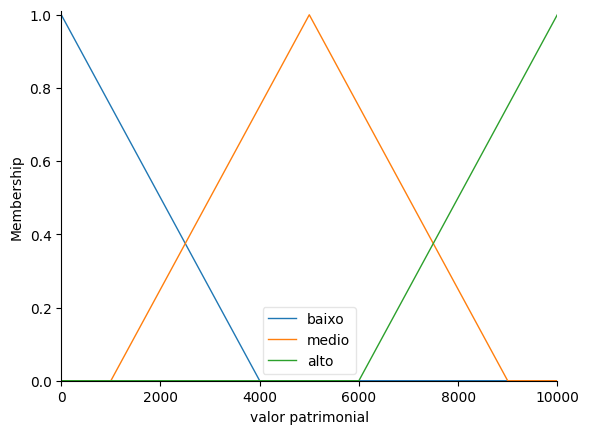

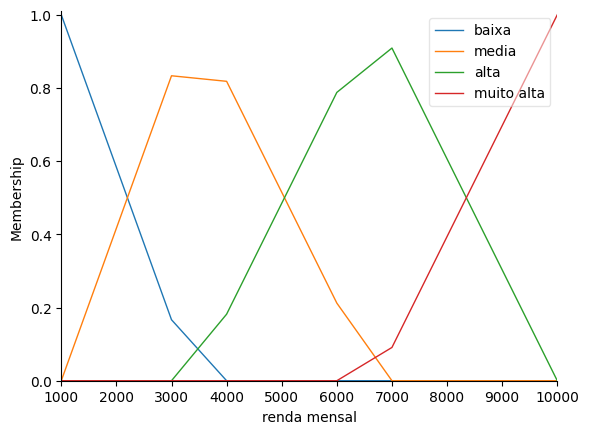

In [6]:
valor_patrimonial.view()
renda_mensal.view()

In [7]:
potencialidade_cliente['baixa'] = fuzz.trapmf(potencialidade_cliente.universe,
                                             [-3.6, -0.4, 0.4, 3.6])
potencialidade_cliente['media'] = fuzz.trimf(potencialidade_cliente.universe,
                                             [1, 5, 9])
potencialidade_cliente['alta'] = fuzz.trimf(potencialidade_cliente.universe,
                                             [6, 10, 14])

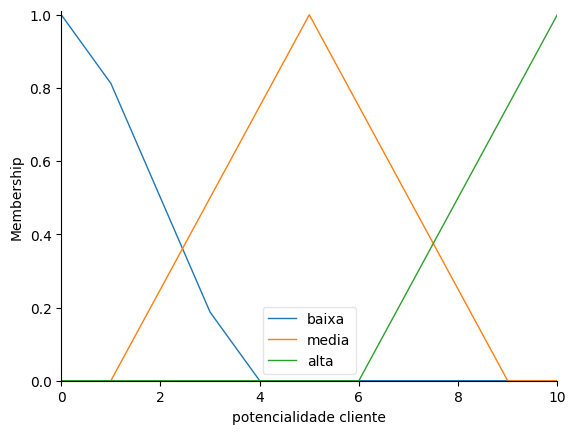

In [8]:
potencialidade_cliente.view()

## Regras do sistema

In [9]:
# Valores patrimoniais baixos
regra1 = ctrl.Rule(
    valor_patrimonial['baixo'] & renda_mensal['baixa'],
    potencialidade_cliente['baixa'])
regra2 = ctrl.Rule(
    valor_patrimonial['baixo'] & renda_mensal['media'],
    potencialidade_cliente['baixa'])
regra3 = ctrl.Rule(
    valor_patrimonial['baixo'] & renda_mensal['alta'],
    potencialidade_cliente['media'])
regra4 = ctrl.Rule(
    valor_patrimonial['baixo'] & renda_mensal['muito alta'],
    potencialidade_cliente['alta'])
# Valores patrimoniais médios
regra5 = ctrl.Rule(
    valor_patrimonial['medio'] & renda_mensal['baixa'],
    potencialidade_cliente['baixa'])
regra6 = ctrl.Rule(
    valor_patrimonial['medio'] & renda_mensal['media'],
    potencialidade_cliente['media'])
regra7 = ctrl.Rule(
    valor_patrimonial['medio'] & renda_mensal['alta'],
    potencialidade_cliente['alta'])
regra8 = ctrl.Rule(
    valor_patrimonial['medio'] & renda_mensal['muito alta'],
    potencialidade_cliente['alta'])
# Valores patrimoniais altos
regra9 = ctrl.Rule(
    valor_patrimonial['alto'] & renda_mensal['baixa'],
    potencialidade_cliente['media'])
regra10 = ctrl.Rule(
    valor_patrimonial['alto'] & renda_mensal['media'],
    potencialidade_cliente['media'])
regra11 = ctrl.Rule(
    valor_patrimonial['alto'] & renda_mensal['alta'],
    potencialidade_cliente['alta'])
regra12 = ctrl.Rule(
    valor_patrimonial['alto'] & renda_mensal['muito alta'],
    potencialidade_cliente['alta'])

## Sistema de controle

In [10]:
sistema_controle = ctrl.ControlSystem(
    [regra1, regra2, regra3, regra4,
     regra5, regra6, regra7, regra8,
     regra9, regra10, regra11, regra12])
sistema = ctrl.ControlSystemSimulation(sistema_controle)